In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

x_train = np.load('Dataset/Train/x_train.npy')
y_train = np.load('Dataset/Train/y_train.npy')

x_test = np.load('Dataset/Test/x_test.npy')
y_test = np.load('Dataset/Test/y_test.npy')

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2187 - accuracy: 0.9346
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0873 - accuracy: 0.9727
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0569 - accuracy: 0.9817
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0408 - accuracy: 0.9870
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0316 - accuracy: 0.9891
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0258 - accuracy: 0.9912


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0879 - accuracy: 0.9774
0.087933249771595 0.977400004863739


In [3]:
## save the model
model.save('models/NumberIdentifier.h5', save_format='h5')

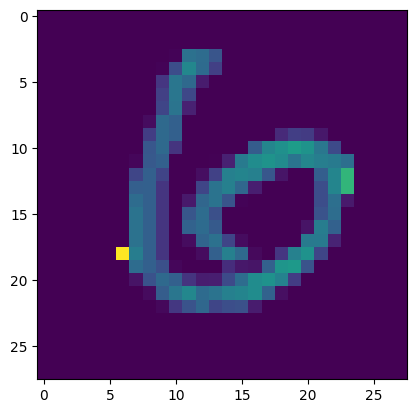

313/313 [==============================] - 1s 945us/step
6


In [4]:
plt.imshow(x_test[11])
plt.show()
prediction = model.predict([x_test])
import numpy as np
print(np.argmax(prediction[11]))

In [5]:
# Display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 50ms/step
The number is probably: 1


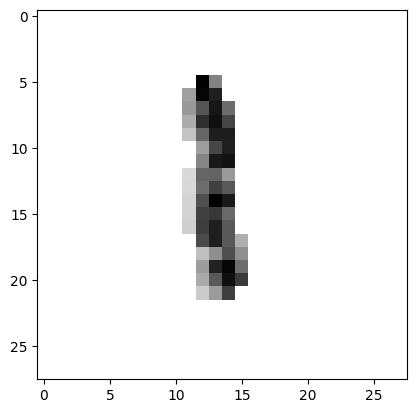

1/1 [==============================] - 0s 20ms/step
The number is probably: 2


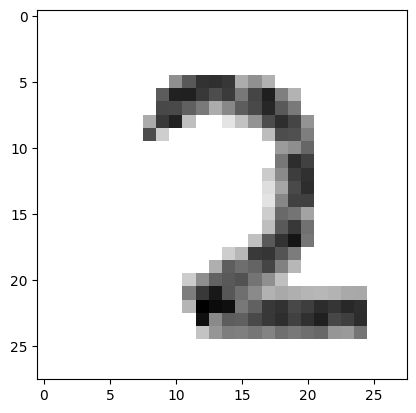

1/1 [==============================] - 0s 20ms/step
The number is probably: 3


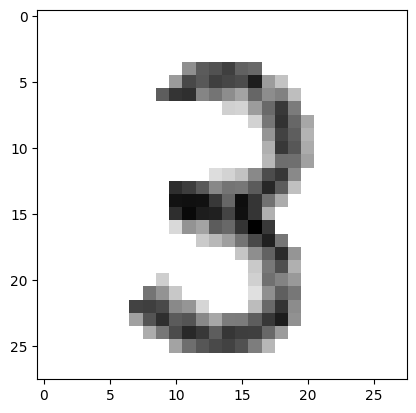

1/1 [==============================] - 0s 19ms/step
The number is probably: 4


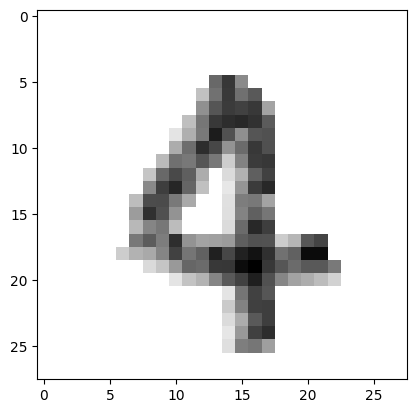

1/1 [==============================] - 0s 19ms/step
The number is probably: 5


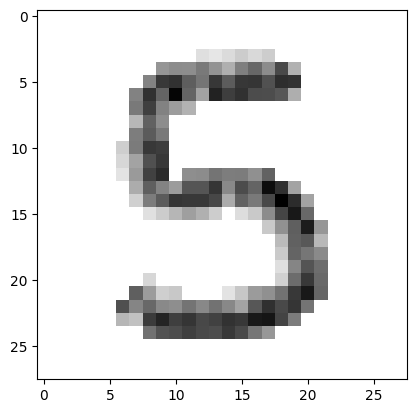

1/1 [==============================] - 0s 16ms/step
The number is probably: 5


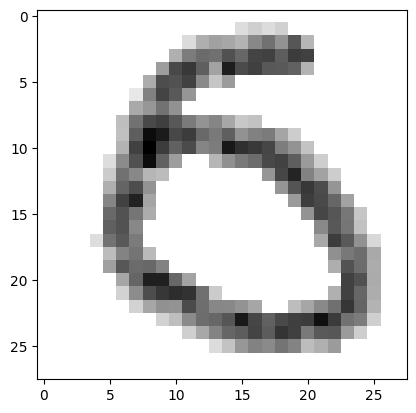

1/1 [==============================] - 0s 19ms/step
The number is probably: 7


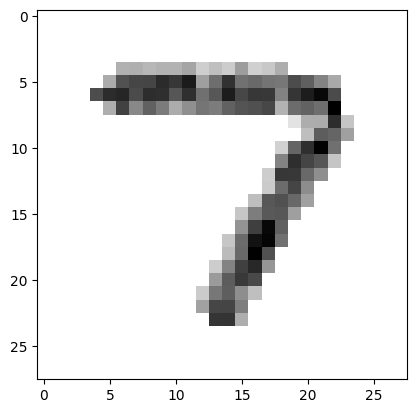

1/1 [==============================] - 0s 20ms/step
The number is probably: 3


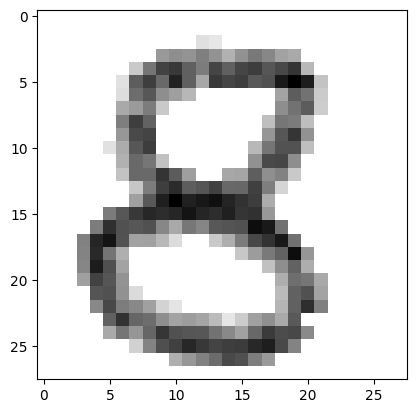

1/1 [==============================] - 0s 17ms/step
The number is probably: 9


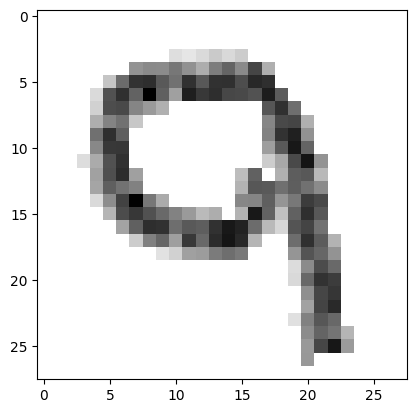

In [6]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

model = tf.keras.models.load_model('models/NumberIdentifier.h5')

imageNumber = 1
while os.path.isfile(f"My_digits/digit{imageNumber}.png"):
    try:
        img = cv2.imread(f"My_digits/digit{imageNumber}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"The number is probably: {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("An error occured")
    finally:
        imageNumber += 1